<a href="https://www.kaggle.com/code/tunnguyn315/kpdla?scriptVersionId=172885740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install decord moviepy deepface -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
gcsfs 2023.12.2.post1 requires fsspec==2023.12.2, but you have fsspec 2024.2.0 which is incompatible.


In [2]:
!pip install decord moviepy deepface -q

from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd

import decord

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
gcsfs 2023.12.2.post1 requires fsspec==2023.12.2, but you have fsspec 2024.2.0 which is incompatible.


2024-04-19 06:21:03.805474: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 06:21:03.805613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 06:21:03.961365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


24-04-19 06:21:15 - Directory /root/.deepface created
24-04-19 06:21:15 - Directory /root/.deepface/weights created


In [33]:
import cv2
import os
from deepface import DeepFace

def extract_frames(video_path, output_dir):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite(os.path.join(output_dir, f"frame{count}.jpg"), image)
        success, image = vidcap.read()
        count += 1

def extract_faces(image_path):
    obj = DeepFace.analyze(img_path = image_path, actions = ['face'])
    return obj["region"]

# specify your directory containing videos here
video_dir = "/path/to/your/video/directory"
output_dir = "/path/to/output/directory"

for video_file in os.listdir(video_dir):
    if video_file.endswith(('.mp4', '.avi', '.mov')):  # add more formats if needed
        video_path = os.path.join(video_dir, video_file)
        extract_frames(video_path, output_dir)

for frame_file in os.listdir(output_dir):
    if frame_file.endswith('.jpg'):  # assuming frames are saved as .jpg
        frame_path = os.path.join(output_dir, frame_file)
        face = extract_faces(frame_path)
        print(f"Face found at {face} in {frame_file}")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/video/directory'

In [77]:
!rm -r /kaggle/working/face_aligned/*
!rm -r /kaggle/tmp/*

24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:33 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
(360, 480, 3)  and  (160, 160, 3)
24-04-19 07:47:34 - ⚠️ Function detectFace is de

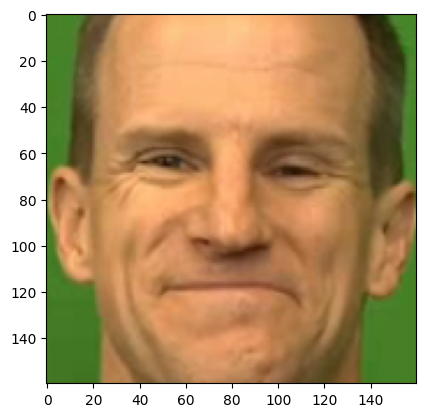

In [48]:
import os
import cv2
from deepface import DeepFace
import PIL

# Define input and output directories
input_dir = "/kaggle/input/crema-d-video"
output_dir = "/kaggle/working/face_aligned"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to extract faces from video and save as images
def extract_faces_from_video(video_path, output_folder):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    fileName = os.path.splitext(video_file)[0]
    if not os.path.exists(os.path.join("/kaggle/tmp", fileName)):
        os.makedirs(os.path.join("/kaggle/tmp", fileName))
    while success:
        path = os.path.join("/kaggle/tmp", os.path.join(fileName, f"frame_det_{count:05}.jpg"))
        
        cv2.imwrite(path, image)
        try:
            # Extract faces from video
            faceImg = DeepFace.detectFace(image, target_size=(160, 160))
            saveFile = os.path.join(output_folder, f"frame_det_{count:05}.jpg")
            print(image.shape, " and ", faceImg[0].shape)
            # Print message
            plt.imshow(faceImg[0])
            cv2.imwrite(saveFile, cv2.cvtColor(faceImg[0], cv2.COLOR_RGB2BGR))
            #PIL.Image.open(path)
            #print(f"Faces extracted from {video_path} and saved to {output_folder}")
        except Exception as e:
            print(f"Error processing {video_path}: {str(e)}")
            
        success, image = vidcap.read()
        count += 1
        

# Iterate over each video in the input directory
for video_file in os.listdir(input_dir):
    if video_file.endswith(".flv"):  # Assuming all videos are in .flv format
        video_path = os.path.join(input_dir, video_file)
        video_name = os.path.splitext(video_file)[0]
        video_output_folder = os.path.join(output_dir, video_name)
        os.makedirs(video_output_folder, exist_ok=True)
        extract_faces_from_video(video_path, video_output_folder)
    break


total 5012
drwxr-xr-x 2 root root 12288 Apr 19 07:47  .
drwxr-xr-x 3 root root  4096 Apr 19 06:21  ..
-rw-r--r-- 1 root root  2250 Apr 19 07:12  frame0.jpg
-rw-r--r-- 1 root root  2235 Apr 19 07:12  frame1.jpg
-rw-r--r-- 1 root root  2286 Apr 19 07:12  frame10.jpg
-rw-r--r-- 1 root root  2278 Apr 19 07:12  frame11.jpg
-rw-r--r-- 1 root root  2309 Apr 19 07:12  frame12.jpg
-rw-r--r-- 1 root root  2274 Apr 19 07:12  frame13.jpg
-rw-r--r-- 1 root root  2296 Apr 19 07:12  frame14.jpg
-rw-r--r-- 1 root root  2305 Apr 19 07:12  frame15.jpg
-rw-r--r-- 1 root root  2289 Apr 19 07:12  frame16.jpg
-rw-r--r-- 1 root root  2321 Apr 19 07:12  frame17.jpg
-rw-r--r-- 1 root root  2334 Apr 19 07:12  frame18.jpg
-rw-r--r-- 1 root root  2387 Apr 19 07:12  frame19.jpg
-rw-r--r-- 1 root root  2227 Apr 19 07:12  frame2.jpg
-rw-r--r-- 1 root root  2353 Apr 19 07:12  frame20.jpg
-rw-r--r-- 1 root root  2364 Apr 19 07:12  frame21.jpg
-rw-r--r-- 1 root root  2301 Apr 19 07:12  frame22.jpg
-rw-r--r-- 1 root roo

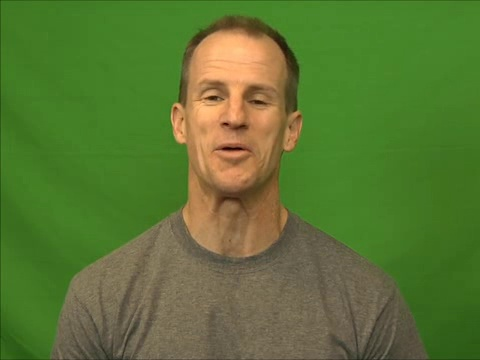

In [52]:
#plt.imshow('/kaggle/working/face_aligned/frame27.jpg')
import PIL
!sudo ls -al /kaggle/tmp/1027_IOM_HAP_XX 
PIL.Image.open('/kaggle/tmp/1027_IOM_HAP_XX/frame_det_00027.jpg')
#PIL.Image.open('/kaggle/working/face_aligned/1027_IOM_HAP_XX/frame_det_00000.jpg')

In [43]:
!rm /kaggle/working/face_aligned/1027_IOM_HAP_XX/*

/kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv
24-04-18 16:21:31 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
3
24-04-18 16:21:31 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


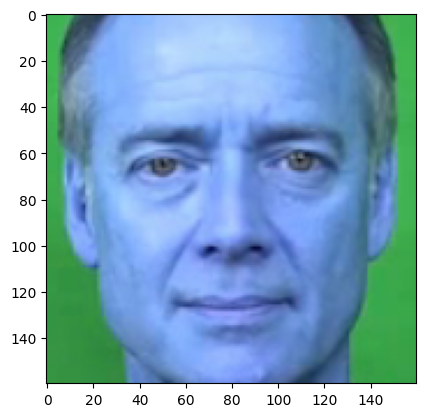

In [36]:
file_paths = ['/kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv']
filepath = file_paths[0]
print(filepath)
audio, vid1 = decord.AVReader(filepath, sample_rate=22050)[:]
#print(len(vid1.asnumpy()))
#for i in range(len(vid1.asnumpy())):
    #print(i)
    #plt.imshow(DeepFace.extract_faces(vid1.asnumpy()[i], target_size=(160,160), grayscale=True, align=False)[0]['face'], cmap='gray')
tmp = DeepFace.detectFace(vid1.asnumpy()[2], target_size=(160,160), align=False)
print(len(tmp[0][0][0]))
plt.imshow(DeepFace.detectFace(vid1.asnumpy()[2], target_size=(160,160), align=False)[0])


In [ ]:
!git clone -b kaggle https://github.com/some113/HiCMAE.git

In [ ]:
!zip -r of.zip /kaggle/working/OpenFace
#!du -hs /kaggle/working/OpenFace/*

In [26]:
%cd /kaggle/working/HiCMAE
!git pull
!python /kaggle/working/HiCMAE/preprocess/face_and_audio/extract_face.py

/kaggle/working/HiCMAE
Already up to date.
Total videos: 7442.
  0%|                                         | 16/7442 [00:01<08:50, 13.99it/s]Note: "/kaggle/working/crema/1081_WSI_FEA_XX" already exist!
Note: "/kaggle/working/crema/1007_IWW_SAD_XX" already exist!
Note: "/kaggle/working/crema/1069_IWL_ANG_XX" already exist!
Note: "/kaggle/working/crema/1023_IEO_SAD_MD" already exist!
Note: "/kaggle/working/crema/1013_TIE_ANG_XX" already exist!
Note: "/kaggle/working/crema/1057_IEO_NEU_XX" already exist!
Note: "/kaggle/working/crema/1040_ITH_SAD_XX" already exist!
Note: "/kaggle/working/crema/1024_IEO_ANG_LO" already exist!
Note: "/kaggle/working/crema/1053_IEO_SAD_LO" already exist!
Note: "/kaggle/working/crema/1067_IOM_NEU_XX" already exist!
Note: "/kaggle/working/crema/1077_IOM_HAP_XX" already exist!
Note: "/kaggle/working/crema/1056_WSI_FEA_XX" already exist!
Note: "/kaggle/working/crema/1014_IOM_ANG_XX" already exist!
Note: "/kaggle/working/crema/1020_ITS_HAP_XX" already exist!
Not

In [35]:
!chmod 777 /kaggle/working/OpenFace/build/bin/FeatureExtraction
!chmod 777 /kaggle/working/CREMA-D/VideoFlash
!chmod 777 /kaggle/working/CREMA-D/VideoFlash/*
#!cat /kaggle/input/crema-d-video/1082_IEO_DIS_LO.flv

In [36]:
import subprocess
#subprocess.call('/kaggle/working/OpenFace/build/bin/FeatureExtraction -f /kaggle/input/crema-d-video/1082_IEO_DIS_LO.flv')

!/kaggle/working/OpenFace/build/bin/FeatureExtraction -verbose -f /kaggle/working/CREMA-D/VideoFlash/1053_IEO_FEA_HI.flv -out_dir /kaggle/working

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: /kaggle/working/OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: /kaggle/working/OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: /kaggle/working/OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: /kaggle/working/OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: /kaggle/working/OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: /kaggle/working/OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: /kaggle/working/OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: /kaggle/working/OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Don

In [39]:
!sudo ls -al /kaggle/working/CREMA-D/VideoFlash | grep "1053"
#!stat /kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv

-rwxrwxrwx 1 root root  221053 Apr 14 06:38 1023_IEO_HAP_HI.flv
-rwxrwxrwx 1 root root  231876 Apr 14 06:38 1053_DFA_ANG_XX.flv
-rwxrwxrwx 1 root root  228739 Apr 14 06:38 1053_DFA_DIS_XX.flv
-rwxrwxrwx 1 root root  243092 Apr 14 06:38 1053_DFA_FEA_XX.flv
-rwxrwxrwx 1 root root  279518 Apr 14 06:38 1053_DFA_HAP_XX.flv
-rwxrwxrwx 1 root root  209770 Apr 14 06:38 1053_DFA_NEU_XX.flv
-rwxrwxrwx 1 root root  233145 Apr 14 06:38 1053_DFA_SAD_XX.flv
-rwxrwxrwx 1 root root  350139 Apr 14 06:38 1053_IEO_ANG_HI.flv
-rwxrwxrwx 1 root root  231492 Apr 14 06:38 1053_IEO_ANG_LO.flv
-rwxrwxrwx 1 root root  261534 Apr 14 06:38 1053_IEO_ANG_MD.flv
-rwxrwxrwx 1 root root  233293 Apr 14 06:38 1053_IEO_DIS_HI.flv
-rwxrwxrwx 1 root root  248830 Apr 14 06:38 1053_IEO_DIS_LO.flv
-rwxrwxrwx 1 root root  244119 Apr 14 06:38 1053_IEO_DIS_MD.flv
-rwxrwxrwx 1 root root  258315 Apr 14 06:38 1053_IEO_FEA_HI.flv
-rwxrwxrwx 1 root root  320539 Apr 14 06:38 1053_IEO_FEA_LO.flv
-rwxrwxrwx 1 root root  265184 Apr 14 06

In [ ]:
!sudo apt -y install libgtk2.0-0

In [8]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/x-flv;base64,' + b64encode(video).decode()
    html += '<video width=1000 controls autoplay loop><source src="%s" type="video/x-flv"></video>' % src 
    return HTML(html)

play('/kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv')


In [ ]:
import os
print(os.listdir("/kaggle/input/crema-d-video"))

In [ ]:
!chmod 111 /kaggle/input/crema-d-video/*
!ls -al /kaggle/input/crema-d-video/*

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-keyring_1.0-1_all.deb && dpkg -i cuda-keyring_1.0-1_all.deb && rm -f cuda-keyring_1.0-1_all.deb && rm -f /etc/apt/sources.list.d/cuda.list

In [ ]:
!git clone https://github.com/sunlicai/HiCMAE

In [ ]:
!git clone 'https://github.com/TadasBaltrusaitis/OpenFace.git'
%cd OpenFace
!bash ./download_models.sh && sudo bash ./install.sh

In [ ]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

In [ ]:
!mkdir CREMA-D
%cd CREMA-D
!git init
!git remote add -f origin https://github.com/CheyneyComputerScience/CREMA-D.git
!git config core.sparseCheckout true
!echo "VideoFlash" >> .git/info/sparse-checkout

In [ ]:
!git pull origin master

In [ ]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'of.zip')

In [ ]:
!sudo apt-get update
!sudo apt-get install build-essential
!sudo apt-get -y install g++-8

In [14]:
!pip install openface

In [18]:
!chmod 777 /opt/conda/lib/python3.10/site-packages/bin/FeatureExtraction

In [16]:
#!pip install openface
import openface as of
from openface import feature_extraction
help(of)
dir(of)
help(of.feature_extraction)

Help on package openface:

NAME
    openface

PACKAGE CONTENTS
    feature_extraction

FILE
    /opt/conda/lib/python3.10/site-packages/openface/__init__.py


Help on module openface.feature_extraction in openface:

NAME
    openface.feature_extraction

FUNCTIONS
    feature_extraction(video_path: Union[str, pathlib.Path], features_path: Union[str, pathlib.Path], verbose: Union[bool, int] = True, overwrite: bool = False)

DATA
    BASE_OPTIONS = '-2Dfp -3Dfp -pdmparams -pose -aus -gaze -au_static'
    BINARY_PATH = PosixPath('/opt/conda/lib/python3.10/site-packages/bin/F...
    Union = typing.Union
        Union type; Union[X, Y] means either X or Y.
        
        To define a union, use e.g. Union[int, str].  Details:
        - The arguments must be types and there must be at least one.
        - None as an argument is a special case and is replaced by
          type(None).
        - Unions of unions are flattened, e.g.::
        
            Union[Union[int, str], float] == Union[i

In [19]:
of.feature_extraction.feature_extraction('/kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv', 'face')

OpenFace will run with the following command:
/opt/conda/lib/python3.10/site-packages/bin/FeatureExtraction -f /kaggle/input/crema-d-video/1001_DFA_ANG_XX.flv -out_dir /tmp/TEMP_1713317578.2597144 -2Dfp -3Dfp -pdmparams -pose -aus -gaze -au_static
It might take a while, depending on the length of the video and the number of CPUs.
OpenFace took 1.0750689506530762.


OSError: [Errno 18] Invalid cross-device link: '/tmp/TEMP_1713317578.2597144/1001_DFA_ANG_XX.csv' -> 'face'

In [13]:
!cp -r /kaggle/working/OpenFace/build/bin /opt/conda/lib/python3.10/site-packages/

In [23]:
of.feature_extraction.feature_extraction()

TypeError: feature_extraction() missing 2 required positional arguments: 'video_path' and 'features_path'

In [21]:
!mv test.py /kaggle/working/OpenFace/build/bin

In [ ]:
!ls -al /opt/conda/lib/python3.10/site-packages